## Tutors - expected math exam results

#### Predict average math exam results for students of the tutors

Ваша задача в этом соревновании - предсказать средний балл на экзамене по математике,
который получают ученики репетиторов из датасета test.csv.
Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки)

https://www.kaggle.com/c/tutors-expected-math-exam-results

Метрика для оценки – Коэффициент детерминации:

https://en.wikipedia.org/wiki/Coefficient_of_determination

\[ R^2 = 1 - \frac{\sigma^2}{\sigma_y^2} \]



You can only use these imports:
``` python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
```

### План
 - Анализ предметной области
 - Очистка и форматирование данных.
 - Разведочный анализ данных.
 - Конструирование и выбор признаков.
 - Сравнение метрик нескольких моделей машинного обучения.
 - Гиперпараметрическая настройка лучшей модели.
 - Оценка лучшей модели на тестовом наборе данных.
 - Интерпретирование результатов работы модели.

### Анализ предметной области

Профиль учителя включает (гипотеза! в постановке задачи не найдено):

- **age** - Возраст
- **years_of_experience** - Количество лет в профессии
- **lesson_price** - Стоимость урока
- **qualification** - Квалификация
- **physics** **chemistry**	**biology**	**english**	**geography** **history** - дополнительная квалификация
- **mean_exam_points** - средний балл (целевая переменная)

Наибольшие вопросы вызывают поля доп квалификации **physics** **chemistry**	**biology**	**english**	**geography** **history**.
Можно предположить что доп квалификация в предметах **physics** **chemistry** должна коррелировать с преподаванием математики
И следовательно, влиять на целевую переменную.

>#### Гипотеза-01-EXT
Проверить корреляцию признаков **physics** **chemistry** на целевую переменную

>#### Гипотеза-02-0EXT
Удалить признаки **biology**	**english**	**geography** **history**

### Очистка и форматирование данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [6]:
train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


> Удаляем лишние переменные

In [15]:
train.drop(columns='Id', inplace=True)
train

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,44.0,0.0,1700.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,78.0
9996,51.0,0.0,1700.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0
9997,34.0,1.0,1250.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0
9998,33.0,3.0,1100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
 10  mean_exam_points     10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


In [10]:
train.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,10000.0,4999.5000,2886.895680,0.0,2499.75,4999.5,7499.25,9999.0
age,10000.0,45.8780,8.043929,23.0,40.00,46.0,51.00,68.0
years_of_experience,10000.0,1.9868,1.772213,0.0,0.00,2.0,3.00,10.0
lesson_price,10000.0,1699.1050,524.886654,200.0,1300.00,1500.0,2150.00,3950.0
qualification,10000.0,1.7195,0.792264,1.0,1.00,2.0,2.00,4.0
physics,10000.0,0.3750,0.484147,0.0,0.00,0.0,1.00,1.0
chemistry,10000.0,0.1329,0.339484,0.0,0.00,0.0,0.00,1.0
biology,10000.0,0.1096,0.312406,0.0,0.00,0.0,0.00,1.0
english,10000.0,0.0537,0.225436,0.0,0.00,0.0,0.00,1.0
geography,10000.0,0.0321,0.176274,0.0,0.00,0.0,0.00,1.0


In [19]:
train.isnull().sum()

age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

> пропуски отсутствуют


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

### Разведочный анализ данных


In [27]:
# первый взгляд на параметр
def first_look(Series1, max_count=0, bins=10, quan=0.999, is_correct_outlier=False, is_show_stat=False):
    Series = Series1.copy()
    # простая корректировка по выбросам
    if is_correct_outlier:
        Series.drop(Series[Series > Series.quantile(quan)].index, inplace=True)
    # расчет основных значений
    Series_mean = round(Series.mean(), 2)
    Series_median = Series.median()
    Series_name = Series.name
    # расчет максимального выброса
    max_count=np.histogram(Series, bins=bins)[0].max()

    plt.figure(figsize = (16, 8))
    Series.hist(bins=bins)
    plt.ylabel('Count')
    plt.xlabel(Series_name)
    # отображение среднего и медианы
    y = np.linspace(0, max_count, bins)
    plt.plot([Series_mean] * bins, y, label='mean  : {:,.2f}'.format(Series_mean),  linewidth=4)
    plt.plot([Series_median] * bins, y, label='median: {:,.2f}'.format(Series_median),  linewidth=4)
    plt.legend()
    plt.title( Series_name + ' distribution')
    plt.show()
    if is_show_stat:
        print(Series.describe())

#### Признак age - возраст



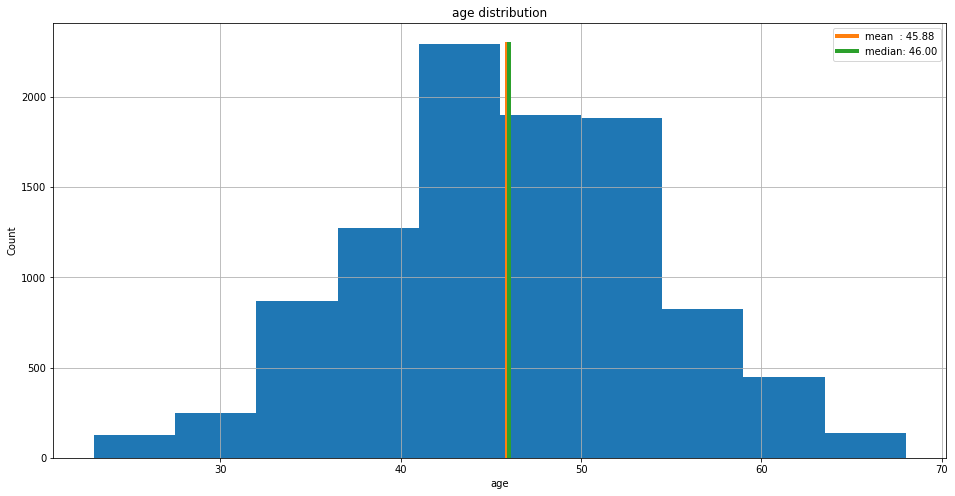

count    10000.000000
mean        45.878000
std          8.043929
min         23.000000
25%         40.000000
50%         46.000000
75%         51.000000
max         68.000000
Name: age, dtype: float64


In [28]:
first_look(train.age, is_show_stat=True)


> Значения признака **age** соответствует возрасту человека. Выбросы отсутствуют. Медианное значение - 46 лет.

#### Признак **years-of-experience** - Количество лет в профессии

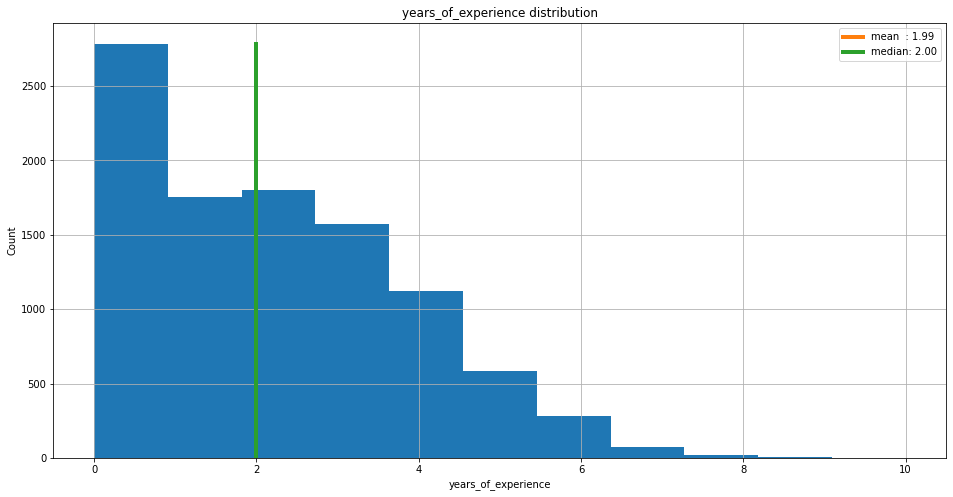

count    10000.000000
mean         1.986800
std          1.772213
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: years_of_experience, dtype: float64


In [46]:
first_look(train.years_of_experience, bins=11, is_show_stat=True)

In [48]:
train[train.years_of_experience==0].count()[0], train[train.years_of_experience==0].count()[0]/train.count()[0]


(2785, 0.2785)

> Значения признака **years_of_experience** В целом соответсвуют предметной области. Однако довольно много значений
> с нулевым значением (2700), это около 30% от всех данных
>

>#### Гипотеза-03-EXP-LOW
Признак **years_of_experience** иммее 30% нулевых значений - мало опыта?
Выделить в отдельную категорию с years_of_experience=0

>#### Гипотеза-04-EXP-BL
Признак **years_of_experience** иммее 30% нулевых значений - не заполнен?



#### Признак **lesson_price** - Стоимость урока


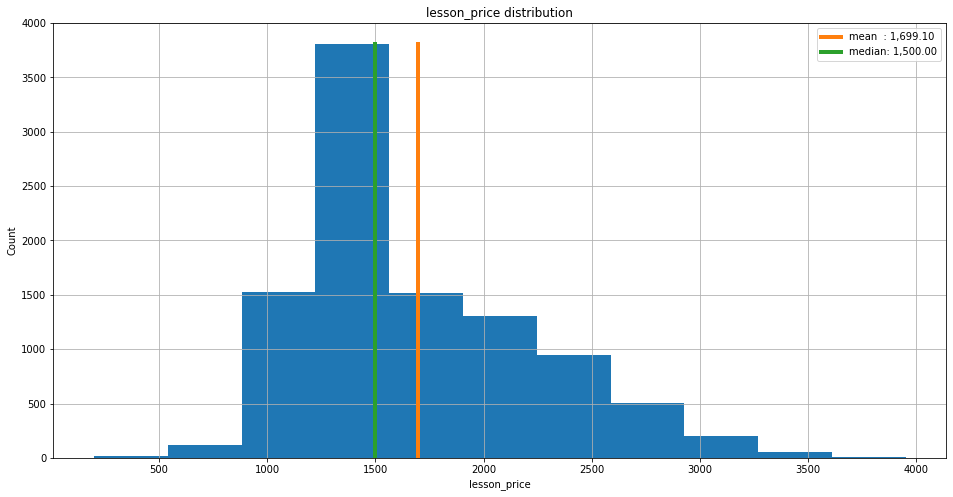

count    10000.000000
mean      1699.105000
std        524.886654
min        200.000000
25%       1300.000000
50%       1500.000000
75%       2150.000000
max       3950.000000
Name: lesson_price, dtype: float64


In [43]:
first_look(train.lesson_price, bins=11, is_show_stat=True)


In [45]:
train[train.lesson_price<1000].count()[0], train[train.lesson_price<1000].count()[0]/train.count()[0]

(238, 0.0238)

> Значения признака **lesson_price** В целом соответствуют предметной области. Однако стоимость урока меньше 1000 может
> быть указана ошибочно или, например, в рекламных целях. Таких значений 2%.
>


#### Признак **qualification** - Квалификация

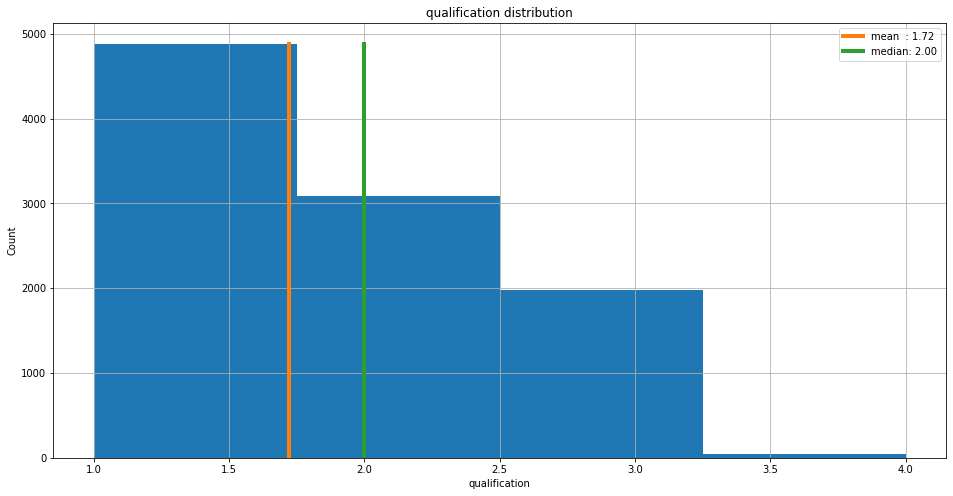

count    10000.000000
mean         1.719500
std          0.792264
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: qualification, dtype: float64


In [51]:
first_look(train.qualification, bins=4, is_show_stat=True)

In [53]:
train.qualification.value_counts()

1.0    4884
2.0    3087
3.0    1979
4.0      50
Name: qualification, dtype: int64